In [49]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, LassoLars, lars_path
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from scikeras.wrappers import KerasRegressor
import sklearn
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_predict



drive.mount('/content/drive')

In [4]:
X = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/X.csv')
X_small = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/X_small.csv')
X_large = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/X_large.csv')
X_no_outlier = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/X_no_outlier.csv')

X = X.drop(columns = ['Unnamed: 0'])
X_small = X_small.drop(columns = ['Unnamed: 0'])
X_large = X_large.drop(columns = ['Unnamed: 0'])
X_no_outlier = X_no_outlier.drop(columns = ['Unnamed: 0'])

all_yield = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/all_yield.csv')
no_outlier_yield = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/no_outlier_yield.csv')
y = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/y.csv')
y_small = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/y_small.csv')
y_large = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/y_large.csv')
y_no_outlier = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/y_no_outlier.csv')

all_yield = all_yield.drop(columns = ['Unnamed: 0'])
no_outlier_yield = no_outlier_yield.drop(columns = ['Unnamed: 0'])
y = y.drop(columns = ['Unnamed: 0'])
y_small = y_small.drop(columns = ['Unnamed: 0'])
y_large = y_large.drop(columns = ['Unnamed: 0'])
y_no_outlier = y_no_outlier.drop(columns = ['Unnamed: 0'])

In [5]:
y.describe()

,Yield/Acre
count,3870.000000
mean,1967.609330
std,1242.737714
min,15.400000
25%,1760.000000
50%,1890.000000
75%,2198.437500
max,22000.000000


In [6]:
y_no_outlier.describe()

,Yield/Acre
count,3849.000000
mean,1886.706982
std,537.085342
min,15.400000
25%,1760.000000
50%,1885.714286
75%,2187.000000
max,4896.000000


## Linear Regression

In [7]:
linear_pipe = Pipeline(steps=[('logreg', LinearRegression())])


In [8]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(linear_pipe, X, y, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


433.7765967954527

In [9]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(linear_pipe, X, all_yield, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


135.65626850260895

In [10]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(linear_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


290.5902332454818

In [11]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(linear_pipe, X_no_outlier, no_outlier_yield, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


81.86398378946379

## Lasso Regression

In [12]:

lasso_pipe = Pipeline(steps=[('Lasso', Lasso(alpha = 1))])


scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(lasso_pipe, X, y, cv=5, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


430.9874940268028

In [13]:

lasso_pipe = Pipeline(steps=[('Lasso', Lasso(alpha = 1))])


scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(lasso_pipe, X, all_yield, cv=5, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

132.97060195802433

## LARS Lasso

In [14]:
lars_pipe = Pipeline(steps=[('Lars', LassoLars(alpha = 1))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(lasso_pipe, X, y, cv=5, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


430.9874940268028

In [15]:
lars_pipe = Pipeline(steps=[('Lars', LassoLars(alpha = 1))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(lasso_pipe, X_no_outlier, y_no_outlier, cv=5, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

290.8054261973399

In [16]:
lars_pipe = Pipeline(steps=[('Lars', LassoLars(alpha = 1))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(lasso_pipe, X_no_outlier, no_outlier_yield, cv=5, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

83.41632709127393

In [17]:
lars_model = LassoLars(alpha = 1)
lars_model.fit(X,y)

LassoLars(alpha=1)

.

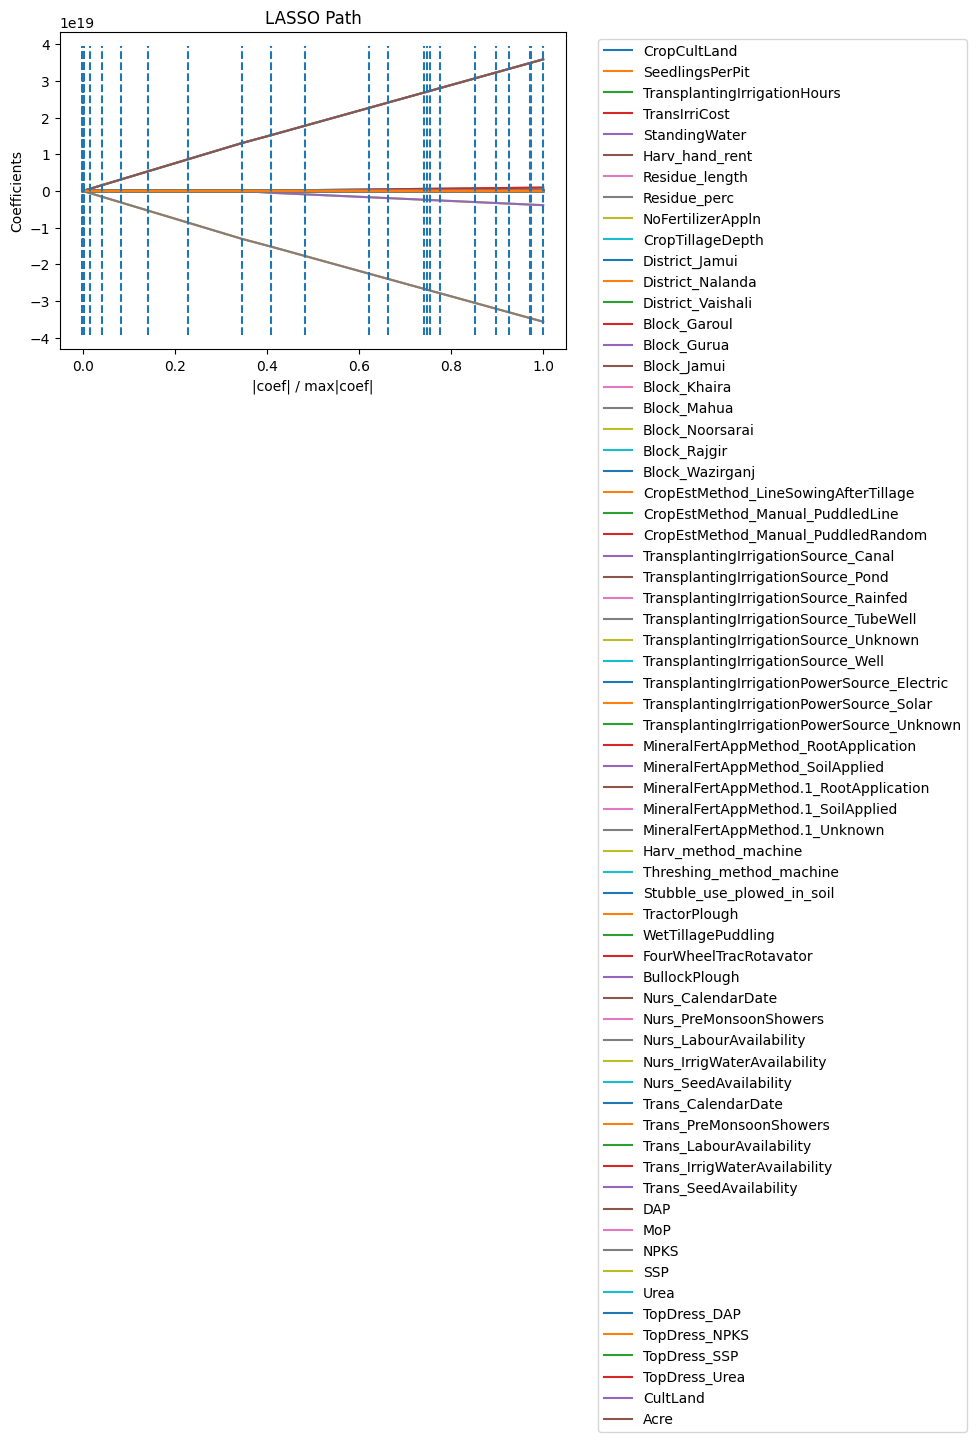

In [18]:
_, _, coefs = lars_path(X.to_numpy(), y.to_numpy().ravel(), method="lars", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
feature_names = X.columns
half_features = len(feature_names)//2


fig, axs = plt.subplots(1, 1, figsize=(10, 10))


for i, feature_name in enumerate(feature_names):
    plt.plot(xx, coefs[i, :], label=feature_name)

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()

.

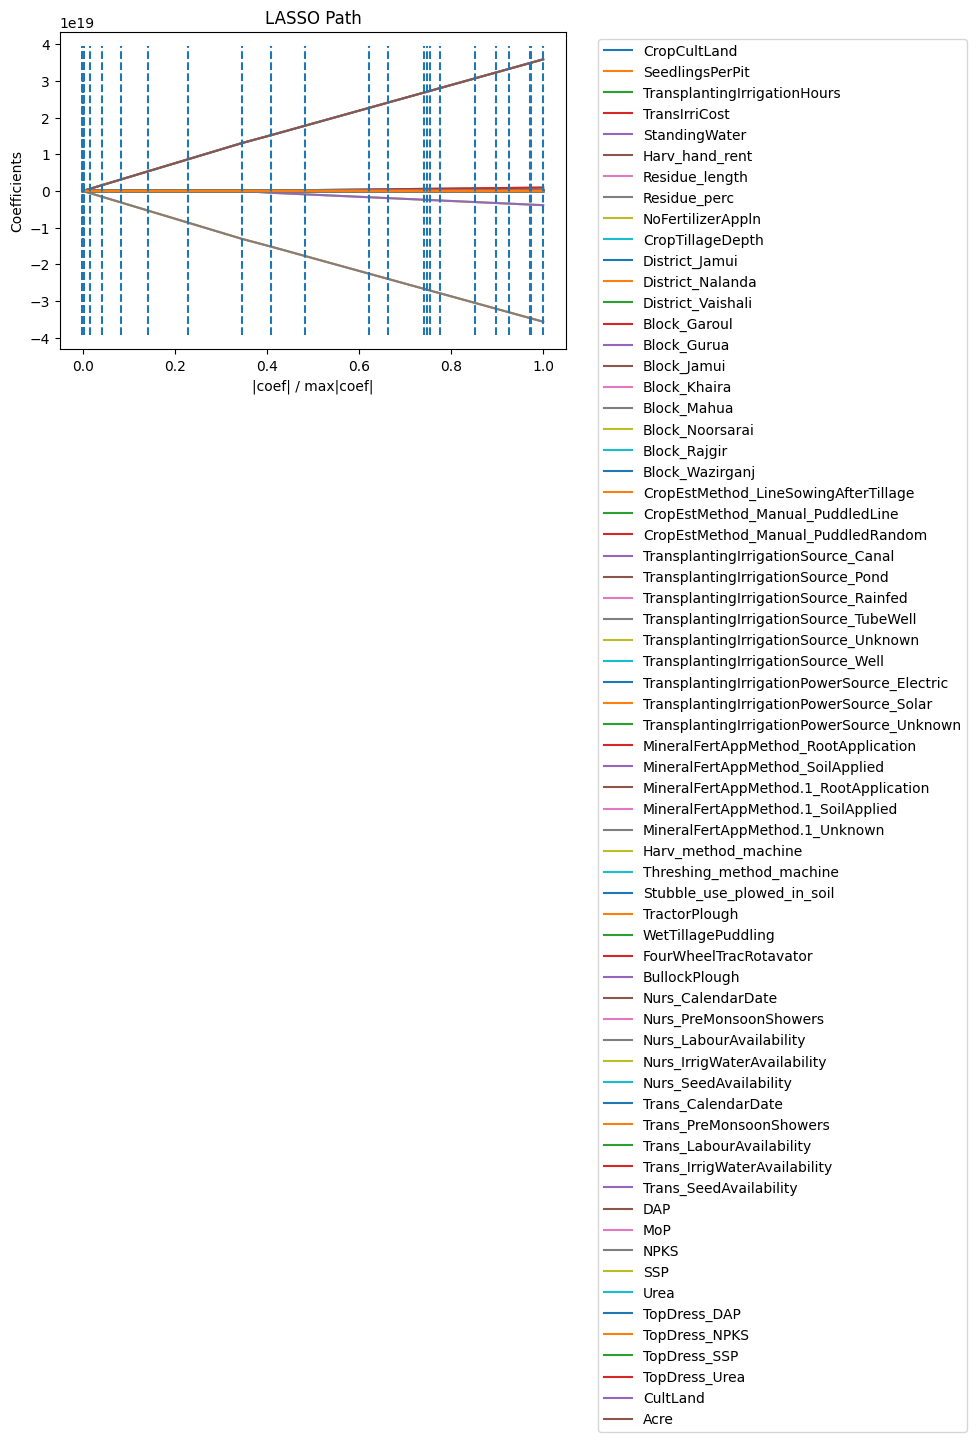

In [19]:
lars_model.fit(X_no_outlier,y_no_outlier)
_, _, coefs = lars_path(X.to_numpy(), y.to_numpy().ravel(), method="lars", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
feature_names = X.columns
half_features = len(feature_names)//2


fig, axs = plt.subplots(1, 1, figsize=(10, 10))


for i, feature_name in enumerate(feature_names):
    plt.plot(xx, coefs[i, :], label=feature_name)

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()

.

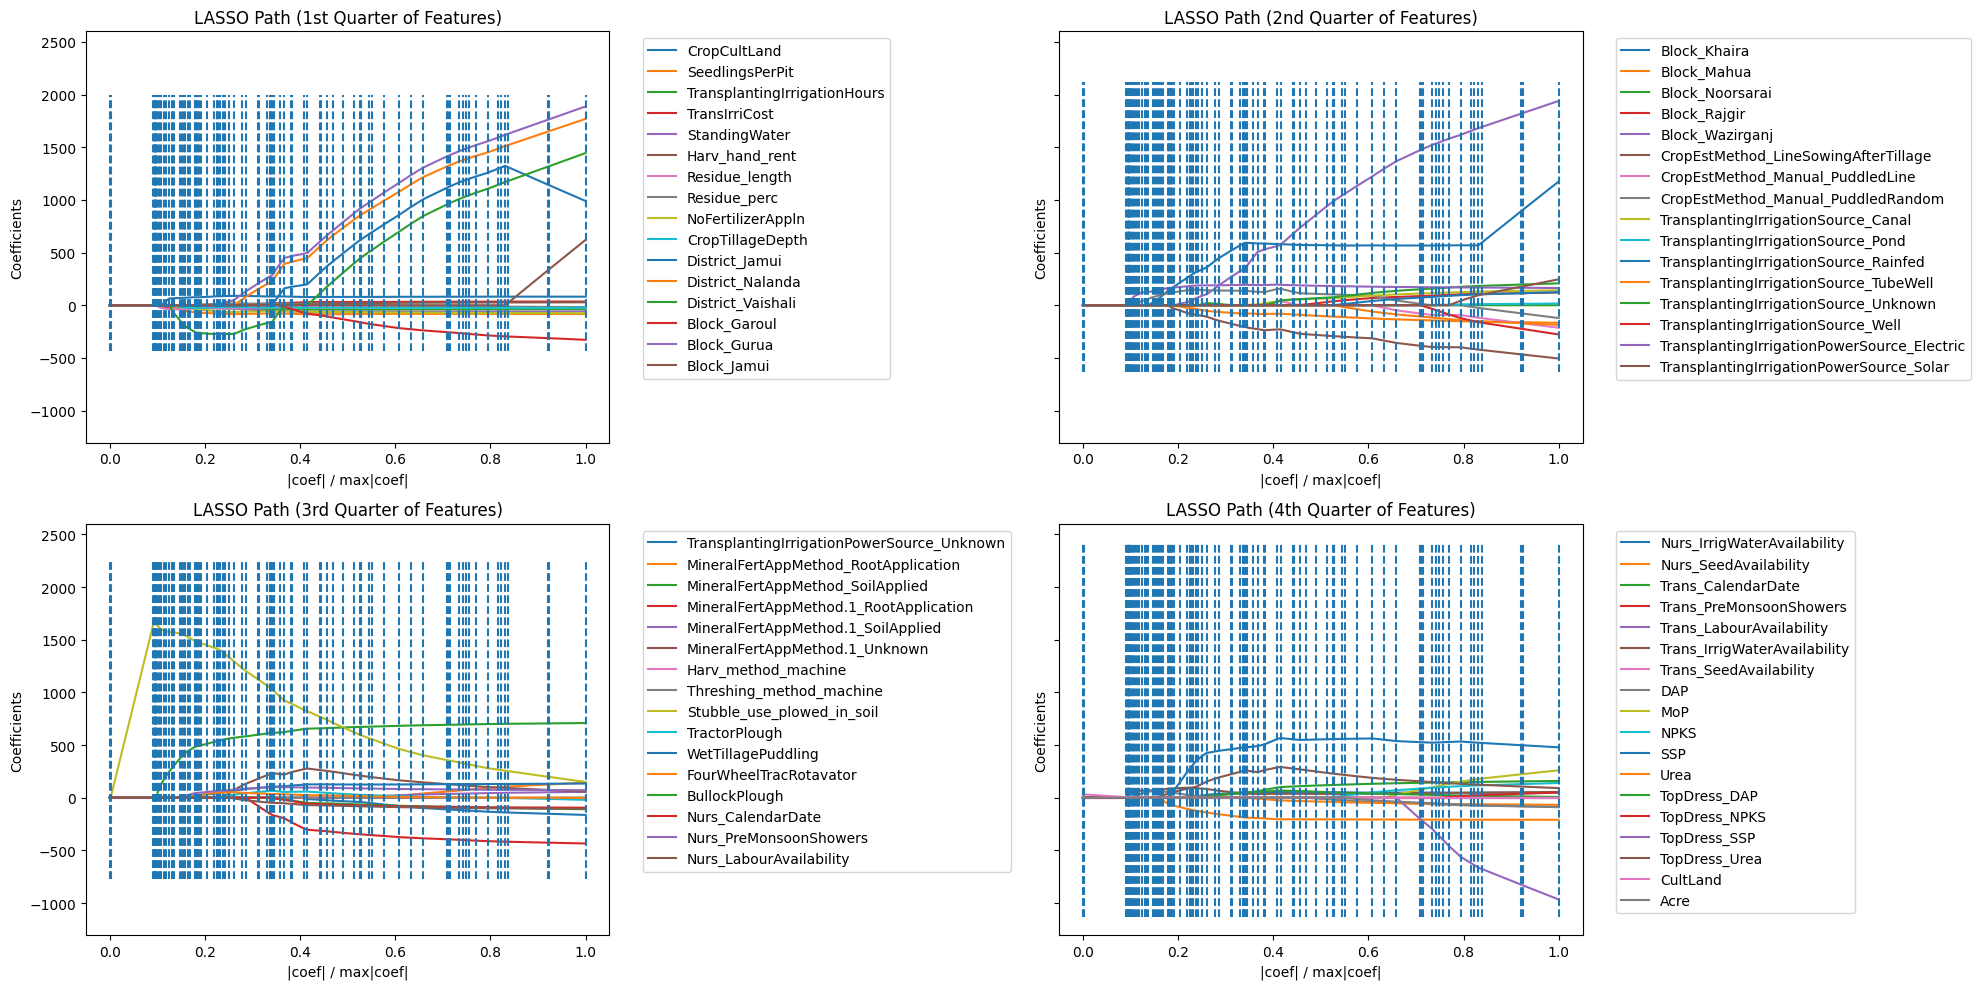

In [20]:
_, _, coefs = lars_path(X_no_outlier.to_numpy(), y_no_outlier.to_numpy().ravel(), method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
feature_names = X_no_outlier.columns
n_features = len(feature_names)

quarter_n_features = n_features // 4

fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharey=True)

def plot_quarter(ax, features_start, features_end, title):
    for i in range(features_start, features_end):
        ax.plot(xx, coefs[i, :], label=feature_names[i])
    ymin, ymax = ax.get_ylim()
    ax.vlines(xx, ymin, ymax, linestyle="dashed")
    ax.set_xlabel("|coef| / max|coef|")
    ax.set_ylabel("Coefficients")
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plot_quarter(axs[0, 0], 0, quarter_n_features, "LASSO Path (1st Quarter of Features)")
plot_quarter(axs[0, 1], quarter_n_features, 2 * quarter_n_features, "LASSO Path (2nd Quarter of Features)")
plot_quarter(axs[1, 0], 2 * quarter_n_features, 3 * quarter_n_features, "LASSO Path (3rd Quarter of Features)")
plot_quarter(axs[1, 1], 3 * quarter_n_features, n_features, "LASSO Path (4th Quarter of Features)")

plt.tight_layout()
plt.show()

## Random Forest

In [21]:
rf_pipe = Pipeline(steps=[('rf', RandomForestRegressor(n_estimators=20, random_state=42, criterion = 'absolute_error'))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(rf_pipe, X, y, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

291.96960205260336

In [22]:
rf_pipe = Pipeline(steps=[('rf', RandomForestRegressor(n_estimators=20, random_state=42, criterion = 'absolute_error'))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(rf_pipe, X, all_yield, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

117.91245478036176

In [23]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(rf_pipe, X_small, y_small, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

193.28510786349756

In [24]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(rf_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

185.0078669325058

In [25]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_rf_yield = cross_val_score(rf_pipe, X_no_outlier, no_outlier_yield, cv=kf, scoring=scorer)

mae_scores_rf_yield = -mae_scores_rf_yield

# Calculate the average MAE across all folds
mean_mae_rf_yield = mae_scores_rf_yield.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

185.0078669325058

In [26]:
print("Baseline: %.2f (%.2f) MAE" % (mae_scores_rf_yield.mean(), mae_scores_rf_yield.std()))

Baseline: 66.33 (2.39) MAE


<ipython-input-27-fef126304406>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_no_outlier.fit(X_no_outlier, y_no_outlier)


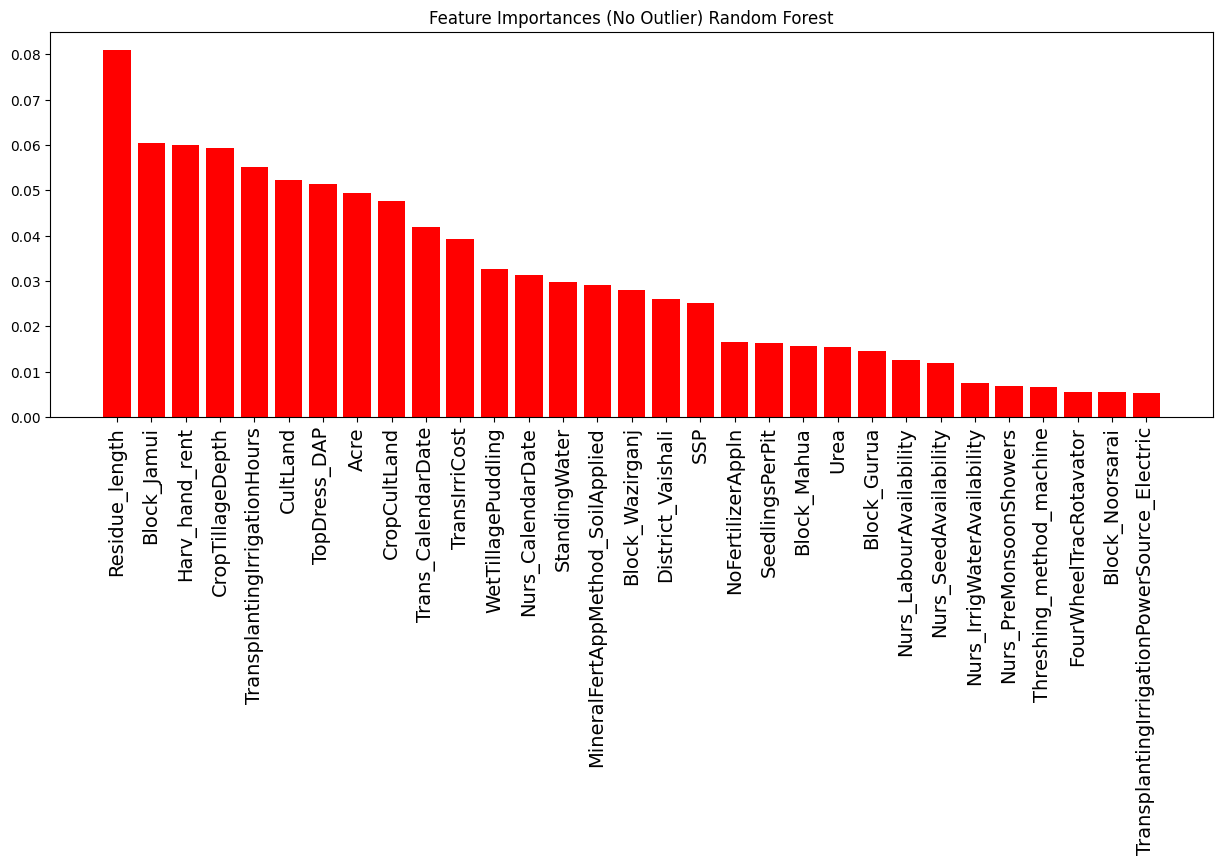

In [27]:
regressor_no_outlier = RandomForestRegressor(n_estimators=20, random_state=42, criterion = 'absolute_error')

regressor_no_outlier.fit(X_no_outlier, y_no_outlier)
importances = regressor_no_outlier.feature_importances_

# Sort them in descending order and select the top 10
sorted_indices = np.argsort(importances)[::-1]
top_sorted_indices = sorted_indices[:31]


# Get the top feature names if available (here using dummy names)
feature_names = X_no_outlier.columns
top_feature_names_no_outlier = feature_names[top_sorted_indices]

# Plotting
plt.figure(figsize=(15, 5))
plt.title("Feature Importances (No Outlier) Random Forest")
plt.bar(range(len(top_sorted_indices)), importances[top_sorted_indices], color="r", align="center")
plt.xticks(range(len(top_sorted_indices)), top_feature_names_no_outlier, rotation=90, fontsize = 14)

plt.show()

<ipython-input-28-f96b5b4890ff>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


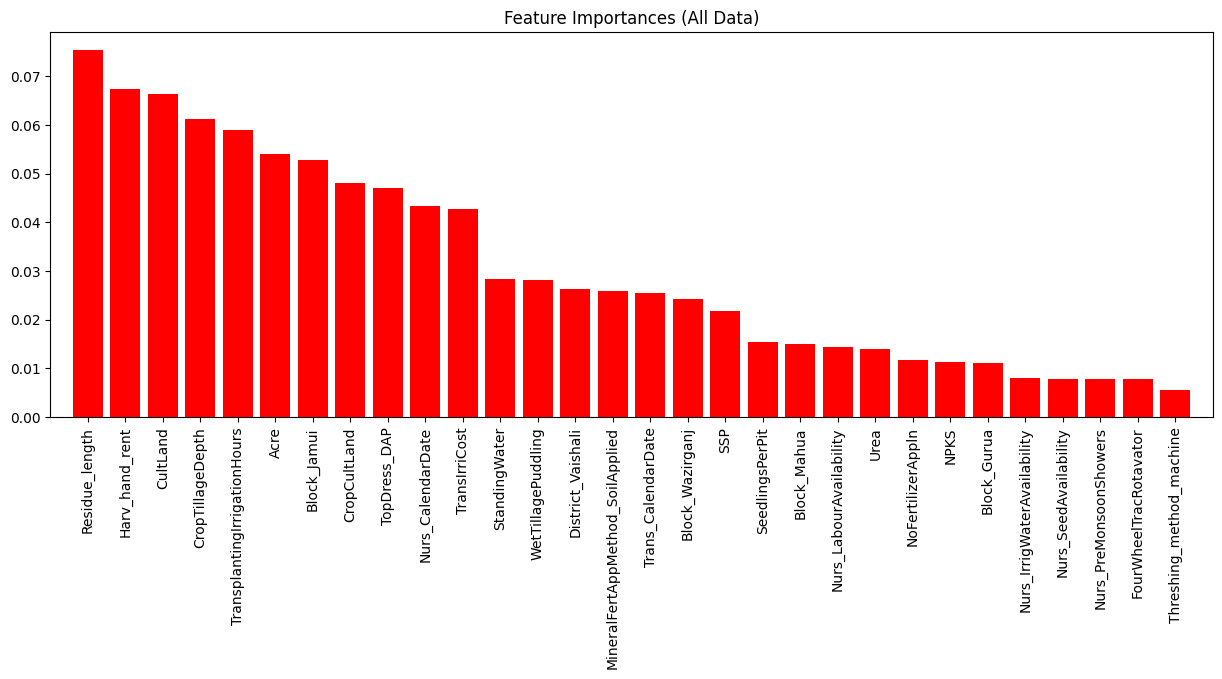

In [28]:
regressor = RandomForestRegressor(n_estimators=20, random_state=42, criterion = 'absolute_error')
regressor.fit(X, y)
importances = regressor.feature_importances_

# Sort them in descending order and select the top 10
sorted_indices = np.argsort(importances)[::-1]
top_sorted_indices = sorted_indices[:30]


# Get the top feature names if available (here using dummy names)
feature_names = X.columns
top_feature_names = feature_names[top_sorted_indices]

# Plotting
plt.figure(figsize=(15, 5))
plt.title("Feature Importances (All Data)")
plt.bar(range(len(top_sorted_indices)), importances[top_sorted_indices], color="r", align="center")
plt.xticks(range(len(top_sorted_indices)), top_feature_names, rotation=90)
plt.xlim([-1, len(top_sorted_indices)])
plt.show()



In [29]:
X_reduc_no_outlier = X_no_outlier[top_feature_names_no_outlier]


.

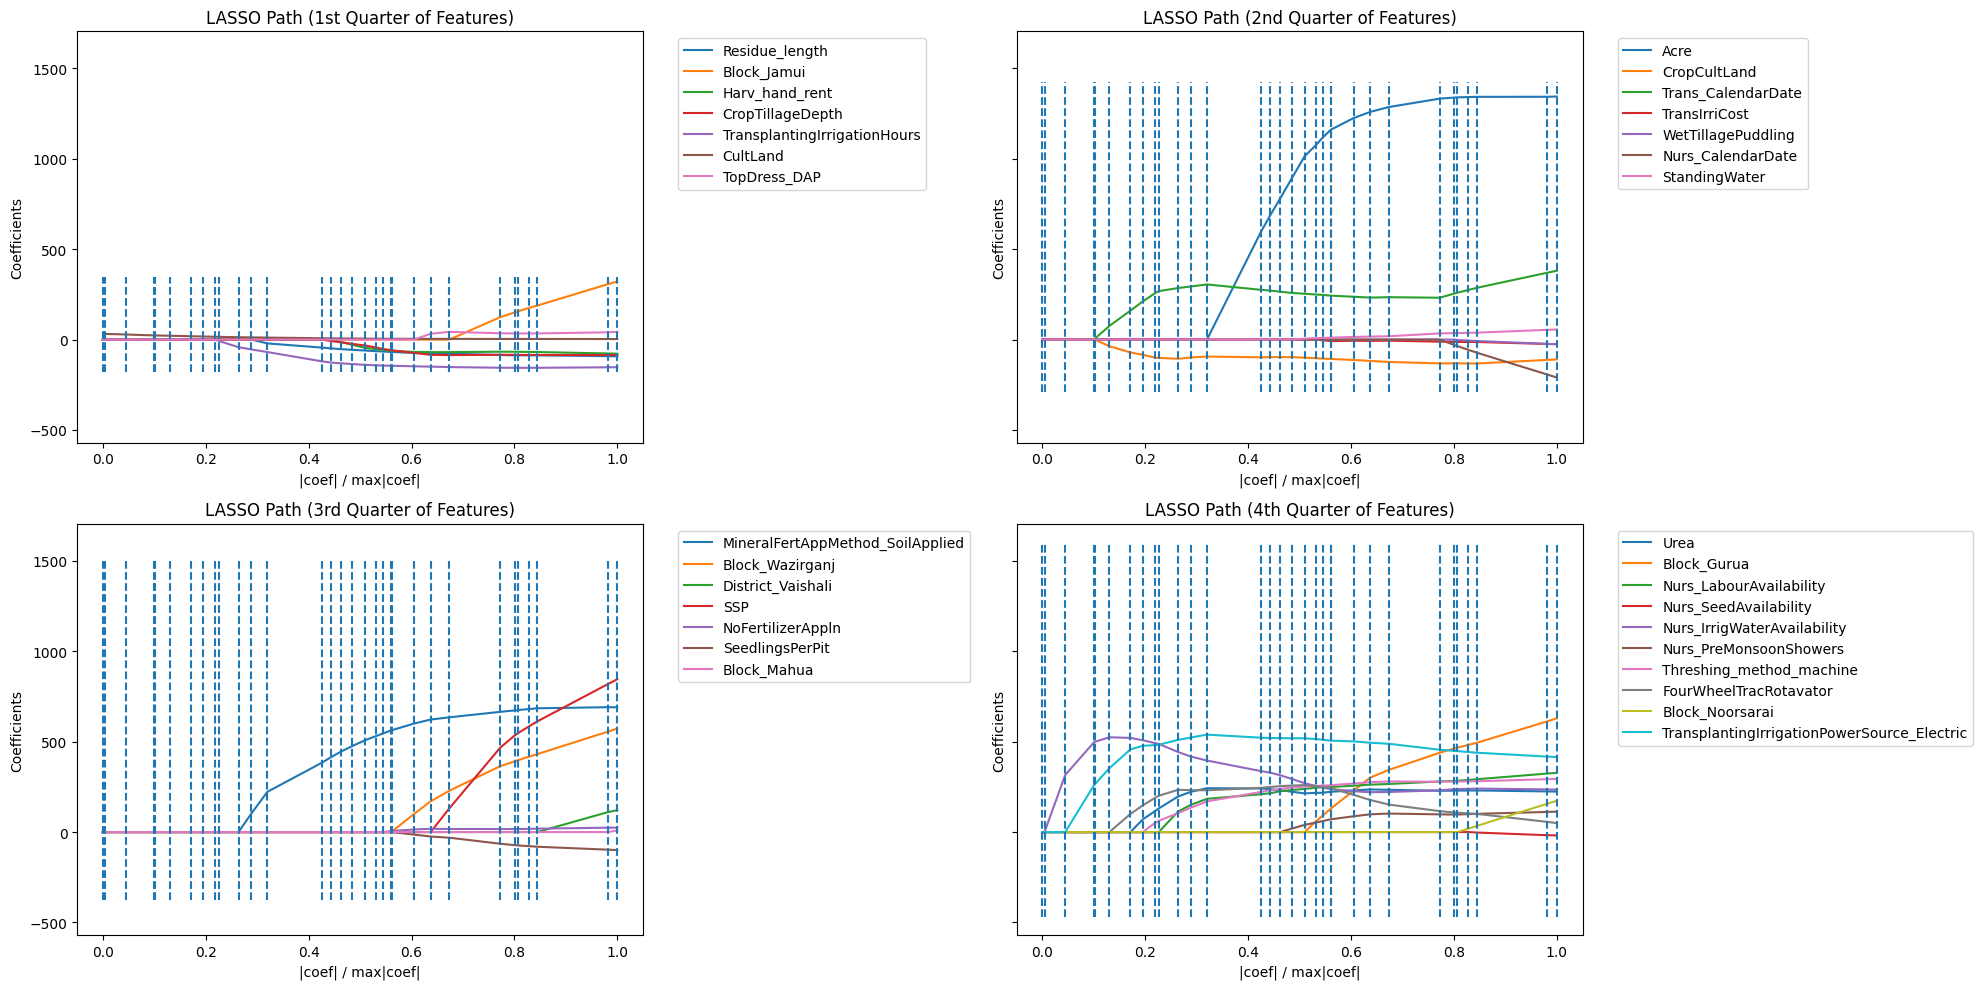

In [32]:
_, _, coefs = lars_path(X_reduc_no_outlier.to_numpy(), y_no_outlier.to_numpy().ravel(), method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
feature_names = X_reduc_no_outlier.columns
n_features = len(feature_names)

quarter_n_features = n_features // 4

fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharey = True)

def plot_quarter(ax, features_start, features_end, title):
    for i in range(features_start, features_end):
        ax.plot(xx, coefs[i, :], label=feature_names[i])
    ymin, ymax = ax.get_ylim()
    ax.vlines(xx, ymin, ymax, linestyle="dashed")
    ax.set_xlabel("|coef| / max|coef|")
    ax.set_ylabel("Coefficients")
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plot_quarter(axs[0, 0], 0, quarter_n_features, "LASSO Path (1st Quarter of Features)")
plot_quarter(axs[0, 1], quarter_n_features, 2 * quarter_n_features, "LASSO Path (2nd Quarter of Features)")
plot_quarter(axs[1, 0], 2 * quarter_n_features, 3 * quarter_n_features, "LASSO Path (3rd Quarter of Features)")
plot_quarter(axs[1, 1], 3 * quarter_n_features, n_features, "LASSO Path (4th Quarter of Features)")

plt.tight_layout()
plt.show()

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state=42, criterion = 'absolute_error')

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(regressor, X_reduc_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

In [ ]:
param_grid = {
    'criterion': ['absolute_error'],
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [2, 10]
}
rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)

grid_search.fit(X_no_outlier, y_no_outlier)

In [ ]:
rf_tuned_pipe = Pipeline(steps=[('rf', RandomForestRegressor(**grid_search.best_params_, random_state=42))])
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_rf = cross_val_score(rf_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores_rf = -mae_scores_rf

# Calculate the average MAE across all folds
mean_mae_rf = mae_scores_rf.mean()

mean_mae_rf

In [ ]:
print("Baseline: %.2f (%.2f) MAE" % (-mae_scores_rf.mean(), mae_scores_rf.std()))

In [51]:
import shap
shap.initjs()

In [ ]:
explainer_rf = shap.Explainer(grid_search.best_estimator_)
shap_values_rf = explainer_rf.shap_values(X_no_outlier)

In [ ]:
shap.summary_plot(shap_values_rf, X_no_outlier)

## XGBoostRegressor

In [33]:
XGB_pipe = Pipeline(steps=[('XGB', XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(XGB_pipe, X_reduc_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

190.93344638210513

In [34]:
XGB_pipe = Pipeline(steps=[('XGB', XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_XGB = cross_val_score(XGB_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores_XGB = -mae_scores_XGB

# Calculate the average MAE across all folds
mean_mae_XGB = mae_scores_XGB.mean()

mean_mae_XGB

187.86579707658112

In [35]:
print("Baseline: %.2f (%.2f) MAE" % (-mae_scores_XGB.mean(), mae_scores_XGB.std()))

Baseline: -187.87 (9.09) MAE


## CatBoost

In [ ]:
!pip install catboost

In [37]:
from catboost import CatBoostRegressor

# Initialize the CatBoostRegressor with RMSE as the loss function
CBR_model = CatBoostRegressor(loss_function='MAE')
CBR_pipe = Pipeline(steps=[('Cat', CatBoostRegressor(loss_function='MAE'))])

In [ ]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_CBR_all = cross_val_score(CBR_pipe, X, y, cv=kf, scoring=scorer)

mae_scores_CBR_all = -mae_scores_CBR_all

# Calculate the average MAE across all folds
mean_mae_CBR_all = mae_scores_CBR_all.mean()

mean_mae_CBR_all

In [39]:
mean_mae_CBR_all

267.02262150961275

In [ ]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_CBR_no_outlier = cross_val_score(CBR_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores_CBR_no_outlier = -mae_scores_CBR_no_outlier

# Calculate the average MAE across all folds
mean_mae_CBR_no_outlier = mae_scores_CBR_no_outlier.mean()



In [41]:
mean_mae_CBR_no_outlier

180.72787758781843

In [ ]:
model_CBR = CatBoostRegressor()
parameters = {'loss_function': ['MAE'], 'learning_rate': [.001, .01, .1], 'depth': [10, 20, 40], 'iterations'    : [100, 200, 400]}

grid_cbr = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 5, n_jobs=-1)

grid_cbr.fit(X_no_outlier, y_no_outlier)

In [43]:
grid_cbr.best_params_

{'depth': 10, 'iterations': 400, 'learning_rate': 0.1, 'loss_function': 'MAE'}

0:	learn: 338.1970975	total: 36.1ms	remaining: 14.4s
100:	learn: 117.8259227	total: 3.88s	remaining: 11.5s
200:	learn: 87.9594725	total: 10.6s	remaining: 10.5s
300:	learn: 73.9649083	total: 16.2s	remaining: 5.33s
399:	learn: 66.9084378	total: 23.9s	remaining: 0us


Text(0.5, 1.0, 'Feature Importance (No Outlier) CatBoost')

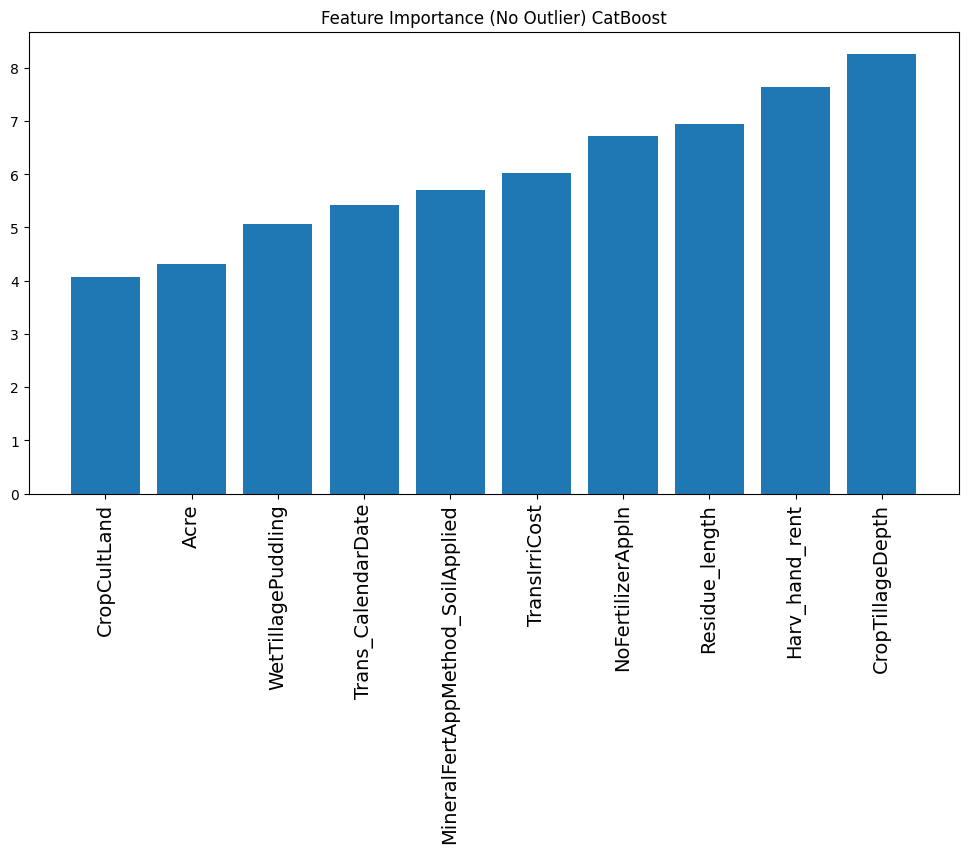

In [44]:
grid_cbr.best_estimator_.fit(X_no_outlier, y_no_outlier, verbose=100)
feature_importance = grid_cbr.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)[-10:]

fig = plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx], rotation='vertical', fontsize = 14)

plt.title('Feature Importance (No Outlier) CatBoost')

In [ ]:
CBR_pipe_best = Pipeline(steps=[('cbr', grid_cbr.best_estimator_)])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_bestCBR_no_outlier = cross_val_score(CBR_pipe_best, X_reduc_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores_bestCBR_no_outlier = -mae_scores_bestCBR_no_outlier

# Calculate the average MAE across all folds
mean_mae_bestCBR_no_outlier = mae_scores_bestCBR_no_outlier.mean()



In [ ]:
y_pred = cross_val_predict(CBR_pipe_best, X_no_outlier, y_no_outlier, cv=kf)


plt.figure(figsize=(10, 6))
plt.scatter(y_no_outlier, y_pred, alpha=0.5)
#plt.plot([min(y_no_outlier), max(y_no_outlier)], [min(y_no_outlier), max(y_no_outlier)], color='red') # Perfect predictions line
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [47]:
print("Baseline: %.2f (%.2f) MAE" % (-mae_scores_bestCBR_no_outlier.mean(), mae_scores_bestCBR_no_outlier.std()))

Baseline: -180.93 (7.52) MAE


In [53]:
explainer_cbr = shap.Explainer(grid_cbr.best_estimator_)
shap_values_cbr = explainer_cbr.shap_values(X_no_outlier)

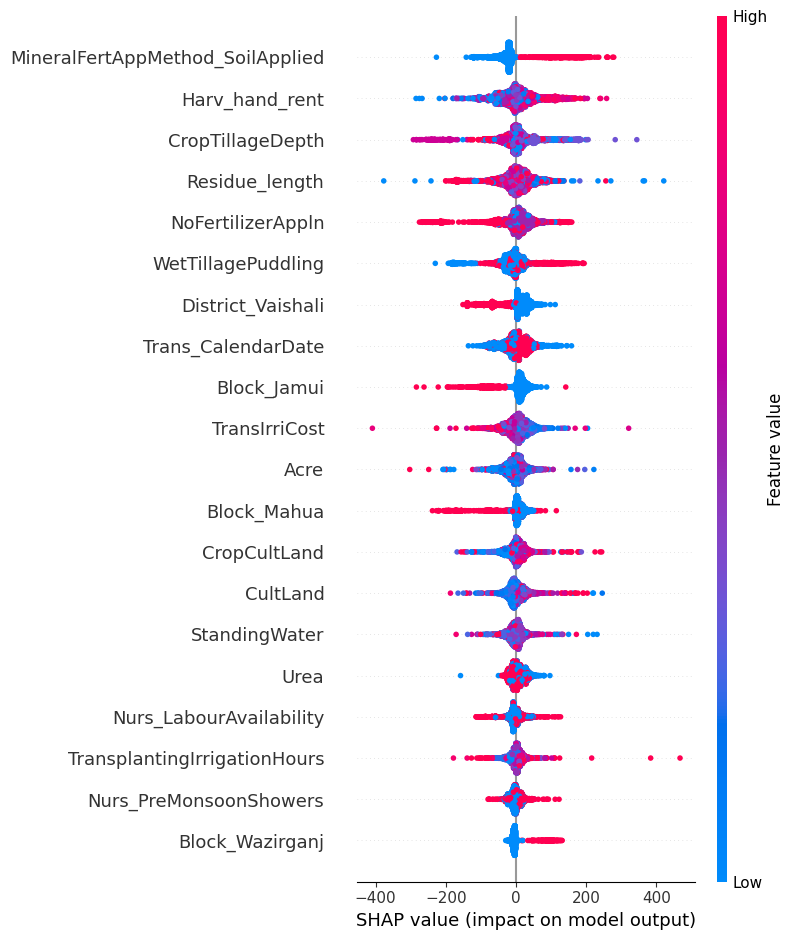

In [54]:
shap.summary_plot(shap_values_cbr, X_no_outlier)

## Dense Neural Network

In [55]:
X_no_outlier

,CropCultLand,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Harv_hand_rent,Residue_length,Residue_perc,NoFertilizerAppln,CropTillageDepth,...,MoP,NPKS,SSP,Urea,TopDress_DAP,TopDress_NPKS,TopDress_SSP,TopDress_Urea,CultLand,Acre
0,0.996754,-0.186209,0.230542,-0.286253,-0.581216,0.178263,0.836734,3.98517,-0.291261,0.448989,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,45.0,0.312500
1,0.466015,-0.186209,0.230542,-0.861837,0.094361,-4.552388,-0.568013,-0.25093,-0.291261,0.448989,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,26.0,0.312500
2,-0.674833,-0.186209,-0.045186,-1.406376,-0.581216,0.365024,0.836734,-0.25093,-0.291261,1.331154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.148148
3,-0.198779,-0.186209,-0.045186,-0.012466,0.094361,-0.344492,-0.065433,-0.25093,-0.291261,1.331154,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,15.0,0.222222
4,1.501531,-0.186209,1.003073,0.211419,-0.581216,0.178263,-0.568013,3.98517,-0.291261,-0.433175,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0,0.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,0.556805,-0.186209,0.665609,0.435439,1.046533,0.178263,-0.311889,3.98517,-0.291261,1.331154,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,28.0,0.375000
3845,-1.444937,-1.205920,-0.382650,-0.012466,0.094361,-4.323289,0.836734,-0.25093,1.281058,0.448989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.136364
3846,1.142951,-1.205920,0.463667,-0.911741,1.046533,1.304490,-0.311889,-0.25093,-1.863580,0.448989,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.0,0.375000
3847,0.146716,1.098474,-0.817717,-0.012466,2.246128,-1.237381,-0.311889,-0.25093,-1.863580,-1.315339,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,0.227273


In [56]:
model = Sequential()
model.add(Dense(65, input_shape=(65,), kernel_initializer='normal', activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))
learning_rate = .001

optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='mean_absolute_error', optimizer= optimizer)

estimator = KerasRegressor(model= model, epochs=100, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X_no_outlier, y_no_outlier, cv=kfold, scoring='neg_mean_absolute_error')

In [ ]:
print("Baseline: %.2f (%.2f) MAE" % (-results.mean(), results.std()))

In [ ]:
no_outlier_yield.describe()

In [ ]:
y